In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_data(datatype ="xor"):
    data=[[0,0],[1,0],[0,1],[1,1]]
    if datatype=="xor":
        return (np.array(data),np.array([int(a[0] ^ a[1]) for a in data]) )
    elif datatype=="and":
        return (np.array(data),np.array([int(a[0] and a[1]) for a in data]) )
    elif datatype=="or":
        return (np.array(data),np.array([int(a[0] or a[1]) for a in data]) )
    elif datatype=="nand":
        return (np.array(data),1-np.array([int(a[0] and a[1]) for a in data]))
    elif datatype=="nor":
        return (np.array(data),1-np.array([int(a[0] or a[1]) for a in data]))
    
    
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def sigmoidprime(x):
    return np.exp(x)/((np.exp(x)+1)**2)

def squared_error(x,y):
    return (x-y)**2

In [2]:
class Our_Mlp():
    def __init__(self,number_of_h_ls=1):
        
        self.n_h_ls=number_of_h_ls
        self.h_ls_values = np.zeros((4,number_of_h_ls))
        self.h_ls_weights = np.random.normal(-5,5,(4,number_of_h_ls,4))
        self.h_ls_weights[:,0,2:4]=np.nan # first layer has only two inputs -> set other weights to nan
        self.h_ls_alpha =  np.ones((4,number_of_h_ls)) # we set the learning_rate to one
        self.h_ls_biases =  np.random.normal(-5,5,(4,number_of_h_ls))
        
        
        # We will store the drives of the perceptrons for the backprob
        
        self.h_ls_drives = np.zeros((4,number_of_h_ls))
        
        self.h_ls_deltas  = np.zeros((4,number_of_h_ls))
        
        self.input =1
        
        
        # No we define the value, weights, bias, learning rate of our output neuron
        
        self.o_v=0
        self.o_w=np.random.normal(-5,5,4)
        self.o_b=float(np.random.normal(-5,5,1))
        self.o_alpha=1
        self.o_delta = 0
        self.o_drive = 0
        
        
    def forward_step(self,input_data):
        """
        input_data is supposed to an 1d numpy.array with shape=(2)
        """
        
        self.input = input_data
        
        # So now we have to calculate the input for the perceptrons of the first hidden layer which get 2 inputs each
        for y in range(0,4):
            
            self.h_ls_drives[y,0]=np.dot(self.h_ls_weights[y,0,0:2],input_data) + self.h_ls_biases[y,0]

            self.h_ls_values[y,0]=sigmoid(self.h_ls_drives[y,0])
            
        # Calculate the next hidden layers
            
        for x in range(1,self.n_h_ls):
            for y in range(0,4):
                self.h_ls_drives[y,x]=np.dot(self.h_ls_weights[y,x,:],self.h_ls_values[:,x-1]) + self.h_ls_biases[y,x]
                self.h_ls_values[y,x]=sigmoid(self.h_ls_drives[y,x])
        
        # Last layer to output neuron
        self.o_drive= np.dot(self.o_w,self.h_ls_values[:,-1]) + self.o_b
        
        self.o_v= sigmoid(self.o_drive)
        
        # let's return the output
        
        return self.o_v
    
    
    
    def backprop_step(self,solution):
        
        self.o_delta = 2*(self.o_v-solution)* sigmoidprime(self.o_drive)
        
        # update the weitghs
        
        self.o_w -= self.o_alpha* self.h_ls_values[:,-1] * self.o_delta
        
        # update the bias
        
        self.o_b -=  self.o_alpha * self.o_delta
        
        
        for x in range(self.n_h_ls-1,-1,-1):
            for y in range(0,4):
                if x == self.n_h_ls-1: # last layer
                    self.h_ls_deltas[y,x] = sigmoidprime(self.h_ls_drives[y,x]) * self.o_w[y] * self.o_delta
                else:
                    self.h_ls_deltas[y,x] = np.dot(self.h_ls_deltas[:,x+1],self.h_ls_weights[:,x+1,y]) * sigmoidprime(self.h_ls_drives[y,x])
                if x == 0:
                    self.h_ls_weights[y,x,:2]-= self.input * self.h_ls_deltas[y,x] * self.h_ls_alpha[y,x]
                else:
                    self.h_ls_weights[y,x]-= self.h_ls_values[:,x-1]  * self.h_ls_alpha[y,x] * self.h_ls_deltas[y,-x]
                
                self.h_ls_biases[y,x]-= self.h_ls_alpha[y,x] * self.h_ls_deltas[y,x]
                

    def __str__(self):
        text = f"""This is a neuronal network with {self.n_h_ls} hidden layers.
The values are:
{self.h_ls_values}

{ self.o_v }

The weights are:
{self.h_ls_weights}

{ self.o_w }

The biases are:

{self.h_ls_biases}

{self.o_b}

The deltas are:
{self.h_ls_deltas}

{ self.o_delta }"""
        return text
        
        
        

In [3]:
data = random_data()
data

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([0, 1, 1, 0]))

In [4]:
a=Our_Mlp(3)

In [5]:
def tick(MLP,forward_step_func,data):
    input_values, solution = data
    
    assert(input_values.shape[0]==solution.size)
    
    accuracy_of_loss = 0
    
    for i, input_value in enumerate(input_values):
        accuracy_of_loss+= abs(MLP.forward_step(input_value)-solution[i]) < 0.5
        MLP.backprop_step(solution[i])
        
    return accuracy_of_loss/4

In [6]:
tick(a,data)
print(a)

This is a neuronal network with 3 hidden layers.
The values are:
[[4.64576635e-05 8.79494991e-03 2.87390392e-06]
 [4.00172948e-06 7.99433598e-04 3.97147967e-05]
 [6.56671383e-01 7.77309597e-08 2.06115145e-03]
 [6.52523579e-04 9.37758582e-01 9.81175367e-01]]

0.0002720007375143581

The weights are:
[[[ -0.37402445  -3.8322554           nan          nan]
  [-10.44320926 -10.9182782   -7.2524612   -7.3729628 ]
  [ -0.40356235  -0.41407262  -1.81481332 -12.1159066 ]]

 [[ -4.7598551   -4.79541726          nan          nan]
  [-15.34663225   6.01633343  -5.91617006 -11.36270816]
  [ -8.7497935   -9.02724566 -13.00736821  -5.65654483]]

 [[  0.17665599   2.8464878           nan          nan]
  [ -9.73975263 -13.59250231 -11.21898179   4.50478472]
  [  0.25137524  -5.11100686   0.94677692   4.34150068]]

 [[-14.2080645    7.63443148          nan          nan]
  [-13.45391352 -10.398238     6.24671101  -1.61667378]
  [ -3.32160413 -11.33847763 -11.15458851   2.778769  ]]]

[-10.8068298   -0.16

In [7]:
erg=[]
weights_of_first_neuron = [[],[],[],[]]

x_axes= np.linspace(0,10000,num=20001)
for i in range(0,len(x_axes)):
    erg.append(tick(a,data))
    if i % 100 == 0:
        for z in range(0,4):
            weights_of_first_neuron[z].append(a.h_ls_weights[0,1,z])
    

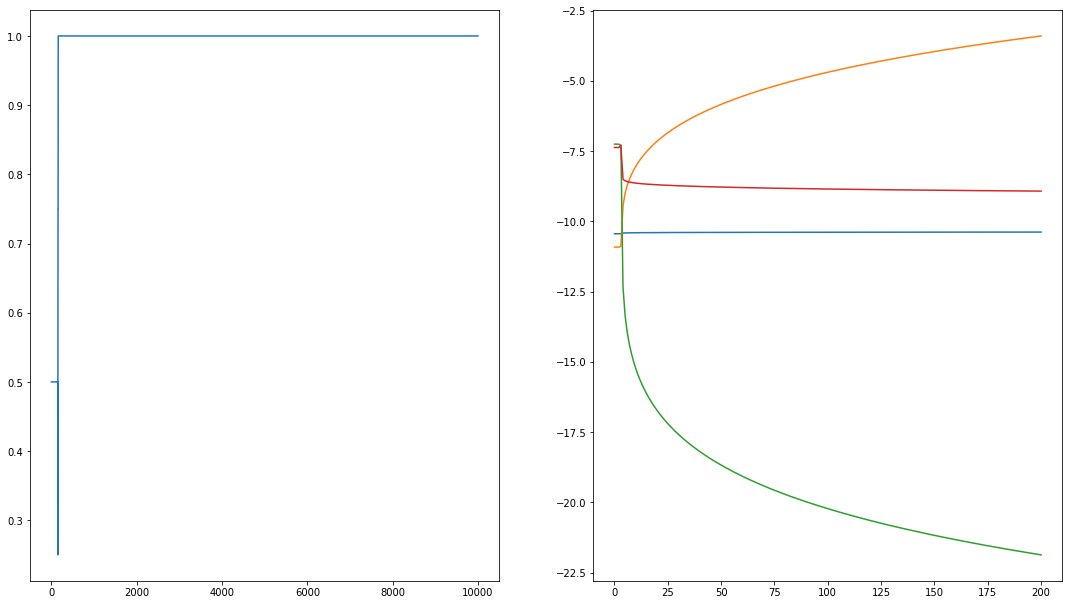

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
ax[0].plot(x_axes,erg)

ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[0])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[1])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[2])
ax[1].plot(range(0,len(weights_of_first_neuron[0])) , weights_of_first_neuron[3])

In [9]:
print(a)

This is a neuronal network with 3 hidden layers.
The values are:
[[3.58104696e-05 1.44395815e-07 6.35806885e-05]
 [7.87436120e-05 1.00233385e-02 8.20994063e-05]
 [8.40784871e-01 1.25925854e-08 3.25513880e-03]
 [1.45284927e-02 9.99996000e-01 9.99830050e-01]]

0.005377411412370689

The weights are:
[[[ -0.54763865  -3.84766225          nan          nan]
  [-10.38291103  -3.40316472 -21.8711869   -8.92465263]
  [ -0.49797932  -0.42002903  -1.81479037 -11.21042582]]

 [[ -4.68823297  -5.56400466          nan          nan]
  [-15.34659791   6.02064772  -5.92341851 -11.36353465]
  [ -8.75938342  -9.02984774 -13.00734686  -4.57418195]]

 [[ -1.46565759   5.72960147          nan          nan]
  [ -9.7397919  -13.59180388 -11.00089845   4.48207881]
  [  0.24953086  -5.11117144   0.94677682   4.34159558]]

 [[-14.20762747   7.61466456          nan          nan]
  [-13.45756495 -10.22546624  -1.78403962 -12.89656216]
  [ -5.37250041 -11.79208605 -11.15466782  18.90533813]]]

[-14.02846389  -0.178

In [10]:
random_data()

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([0, 1, 1, 0]))

In [11]:
a.forward_step([1,1])

0.005376794875092366

In [12]:
a.forward_step([1,0])

0.9973985484987148

In [13]:
a.forward_step([0,1])

0.9916554212510436

In [14]:
a.forward_step([0,0])

0.0058349121681801255